In [ ]:
!apt-get install -y libgeos-dev
!pip install basemap

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv(r'/content/earthquakes_2023_global.csv')

pd.set_option('display.max_columns', None)

In [ ]:
data.head( )

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [ ]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [ ]:
data.shape

(26642, 22)

In [ ]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [ ]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

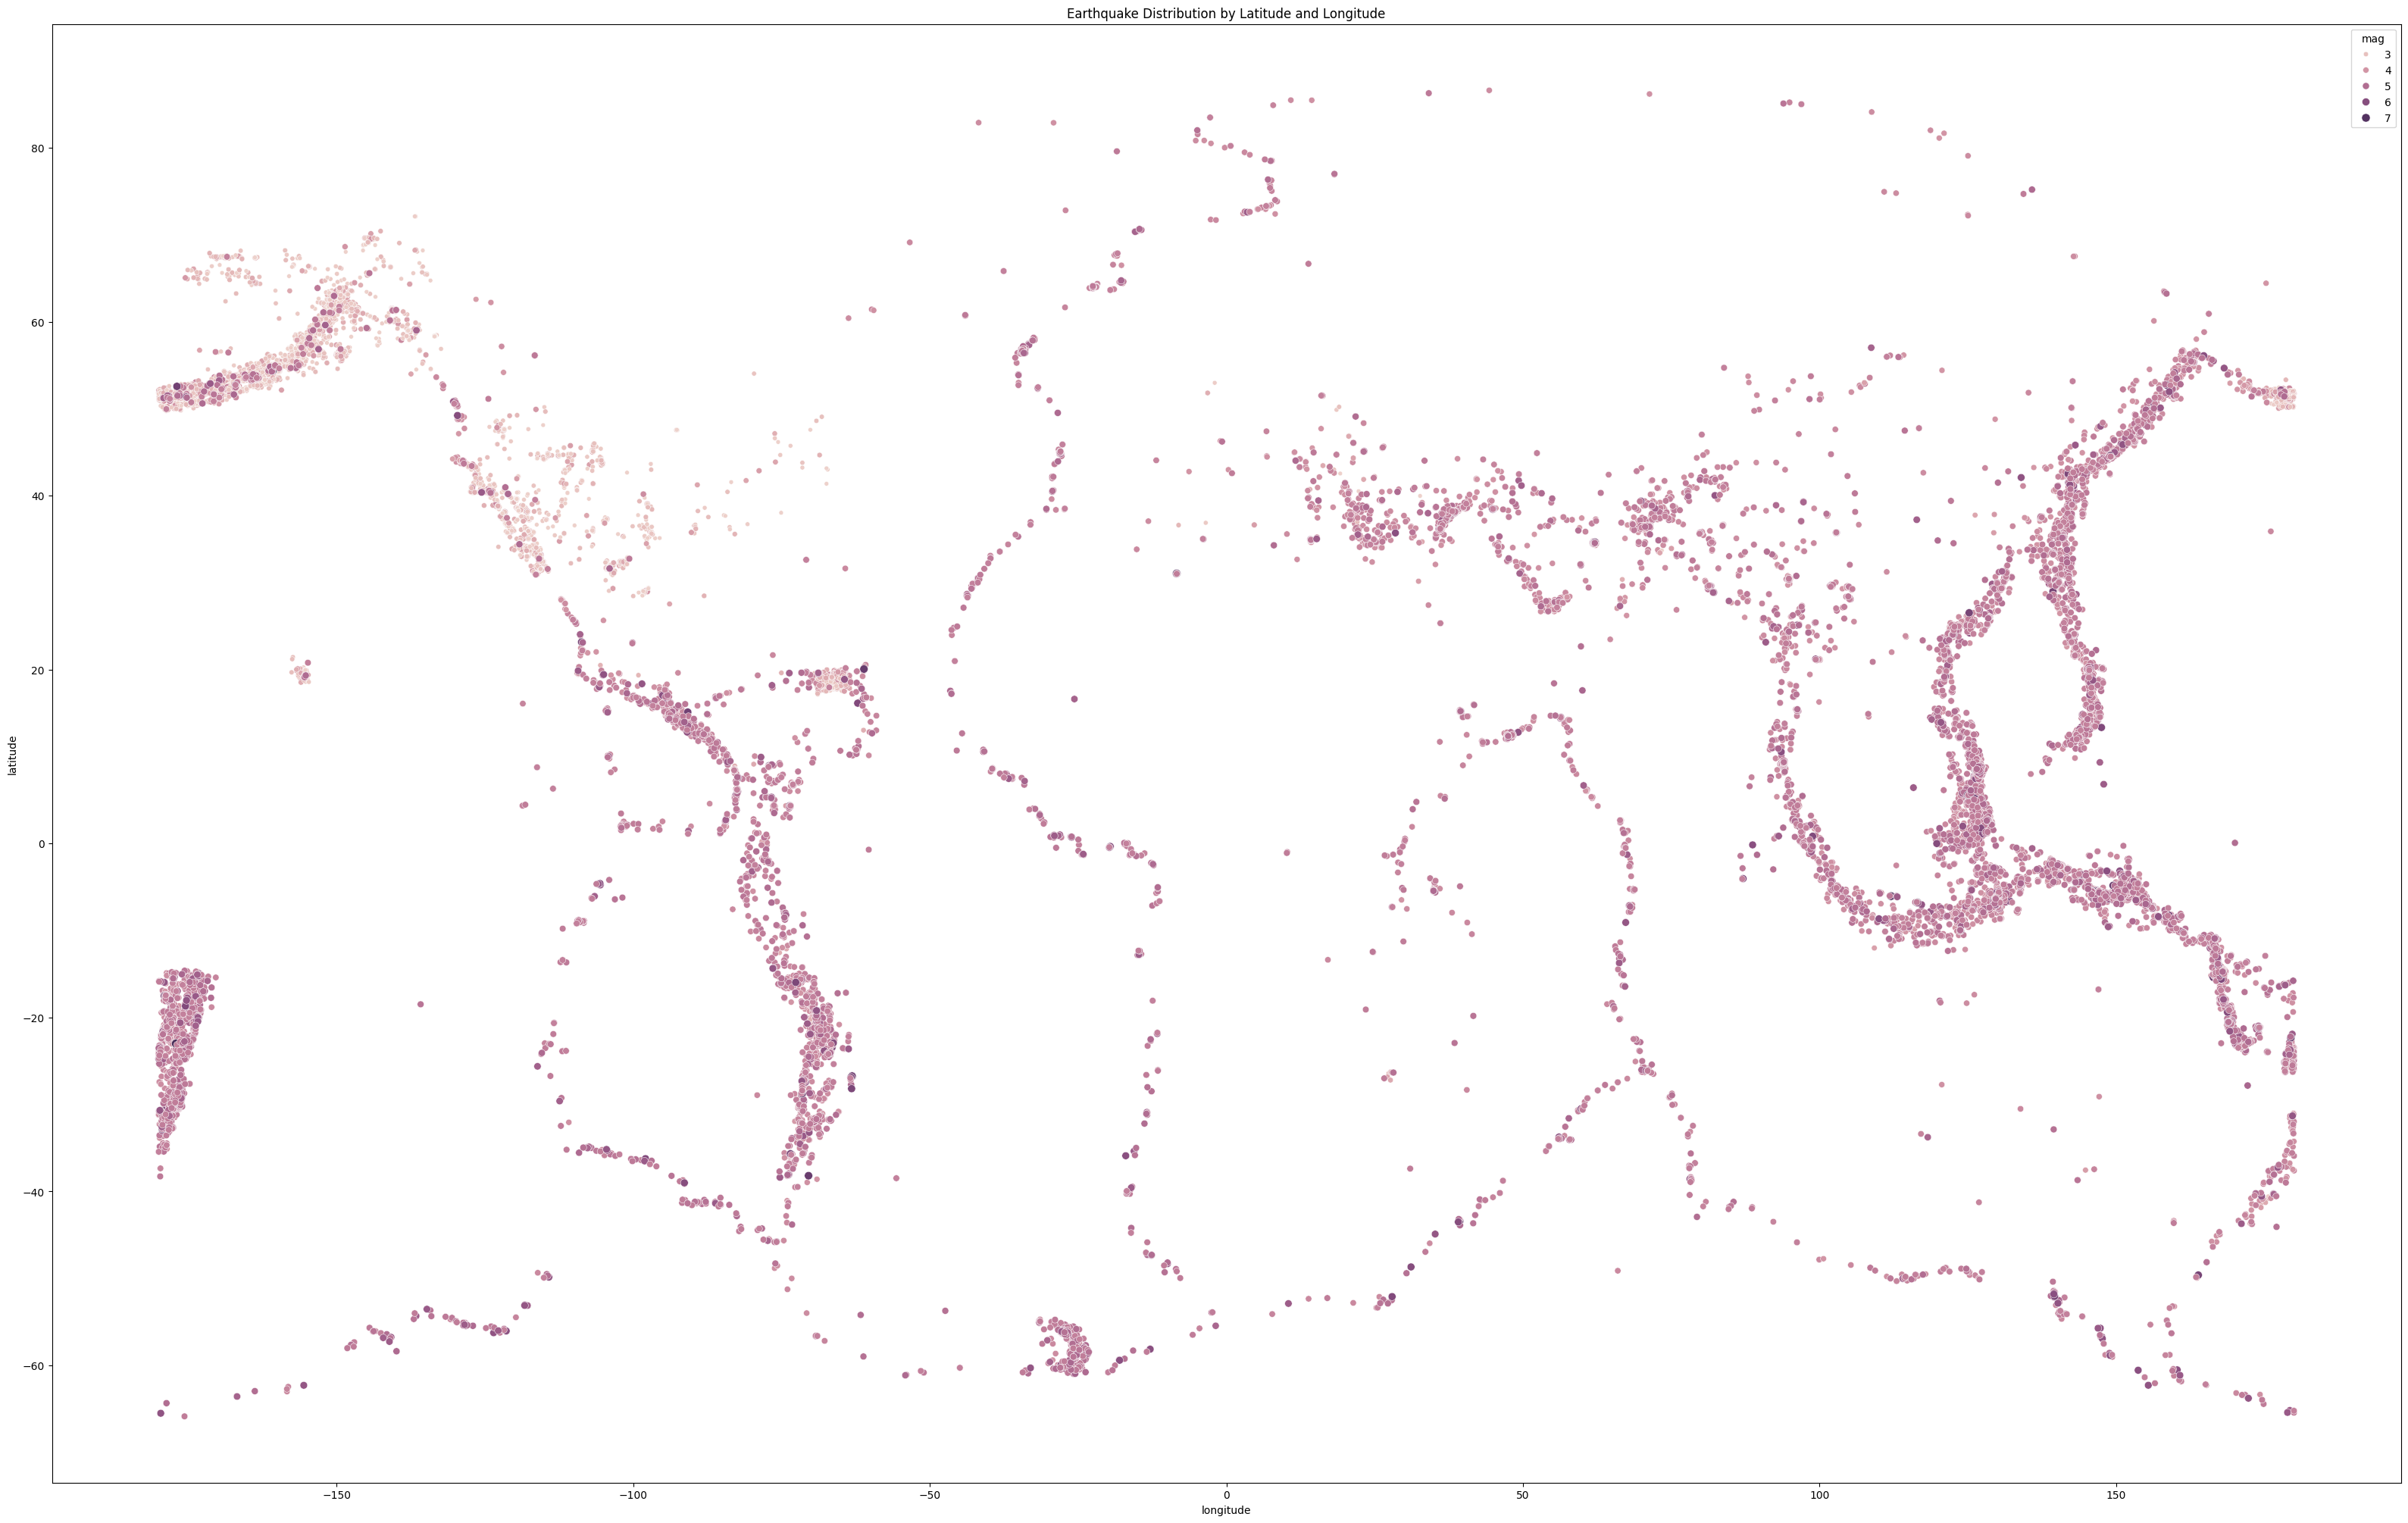

In [ ]:
plt.figure(figsize=(40, 25))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag', data=data)
plt.title('Earthquake Distribution by Latitude and Longitude')
plt.show()

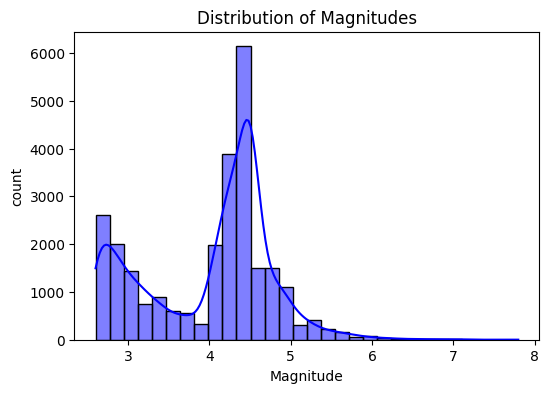

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['mag'], bins=30, kde=True, color='blue')
plt.title('Distribution of Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('count')
plt.show()

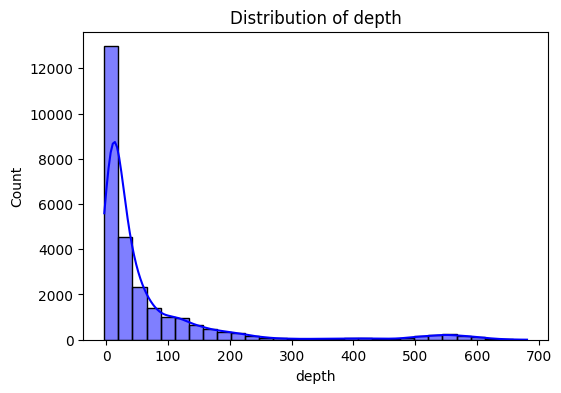

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['depth'], bins=30, kde=True, color='blue')
plt.title('Distribution of depth')
plt.xlabel('depth')
plt.show()

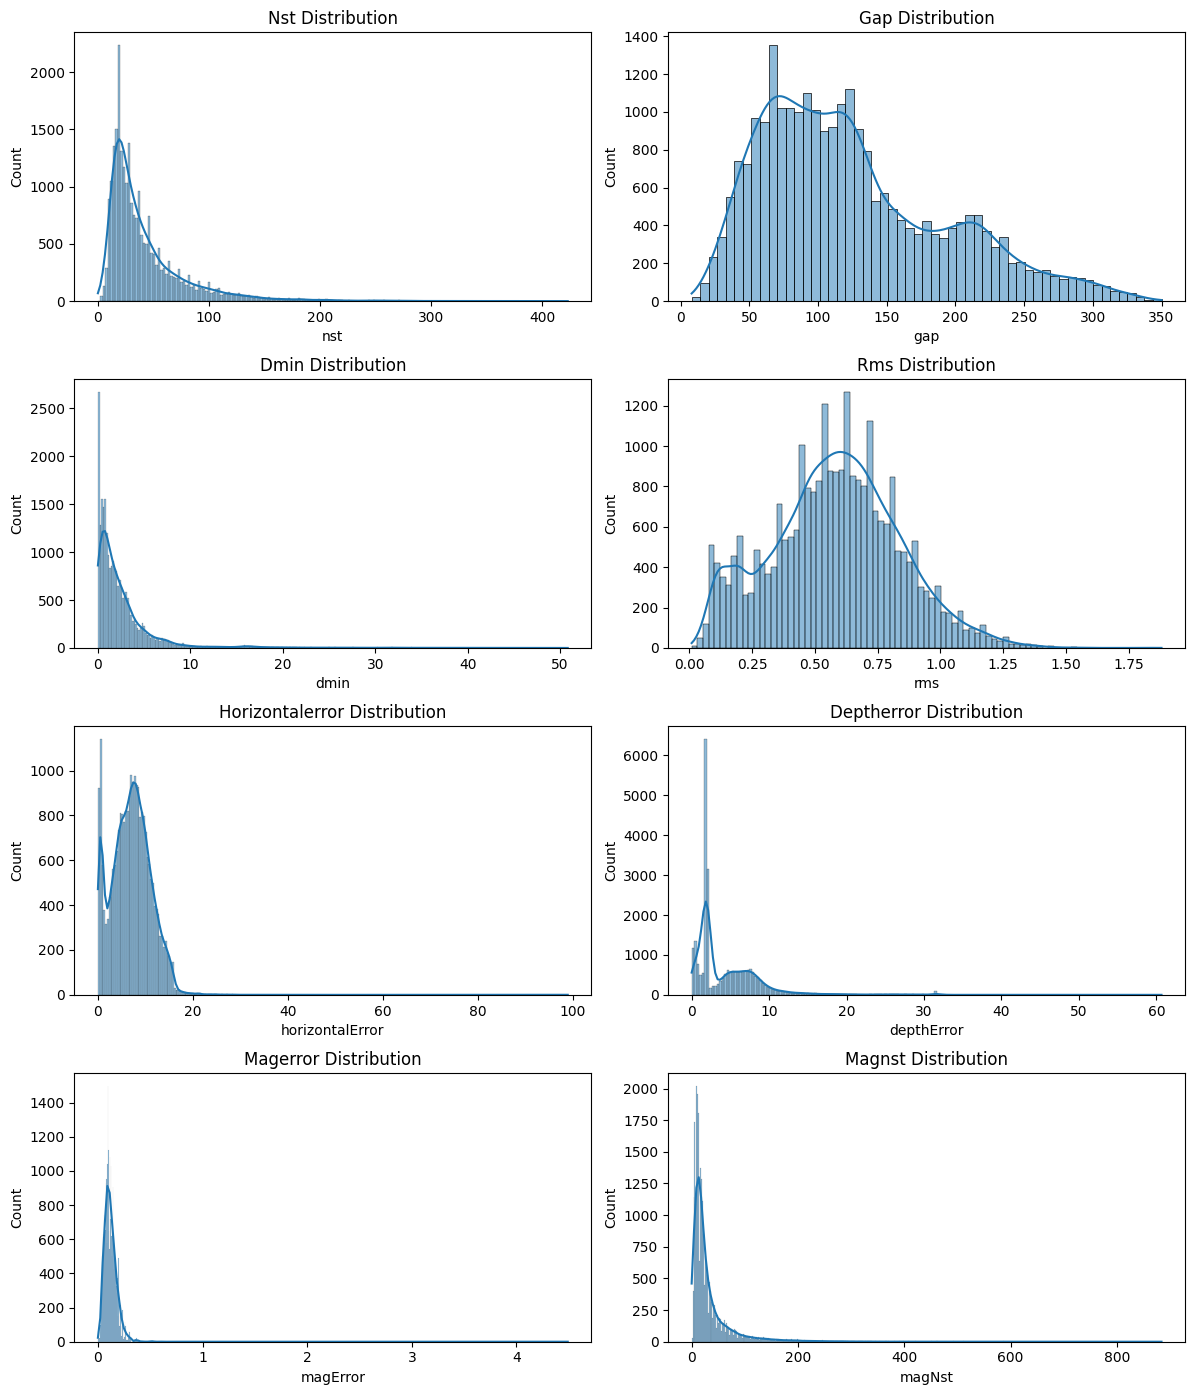

In [ ]:
dist_num_data=data.select_dtypes(include=['float64', 'int64']).drop(['latitude','longitude','depth','mag'],axis=1)
fig,axs=plt.subplots(len(dist_num_data.columns)//2,2,figsize=(12,14))
axs=axs.flatten()
for ax,d in zip(axs,dist_num_data):
 sns.histplot(ax=ax,data=dist_num_data[d],kde=True)
 ax.set_title("{} Distribution".format(str(dist_num_data[d].name).capitalize()))

fig.tight_layout(pad=.9)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'earthquake'),
  Text(1, 0, 'mining explosion'),
  Text(2, 0, 'quarry blast'),
  Text(3, 0, 'ice quake'),
  Text(4, 0, 'explosion'),
  Text(5, 0, 'Landslide'),
  Text(6, 0, 'volcanic eruption'),
  Text(7, 0, 'landslide')])

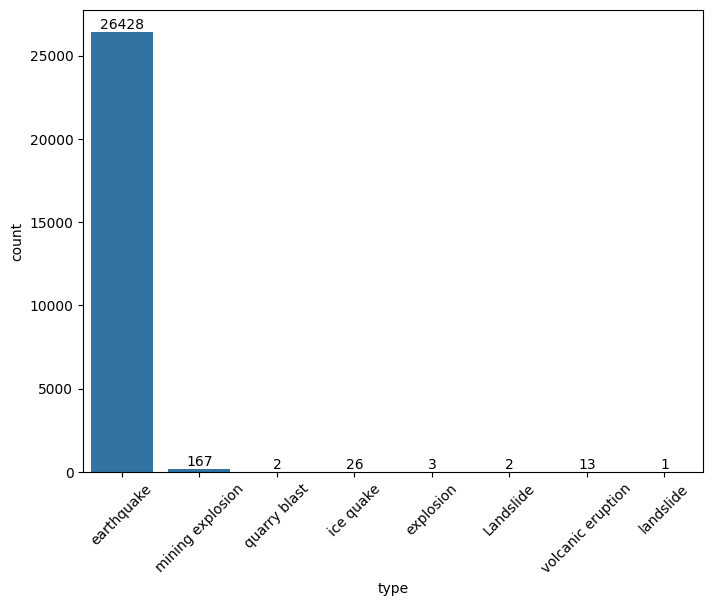

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='type',data=data)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ml'),
  Text(1, 0, 'mb'),
  Text(2, 0, 'md'),
  Text(3, 0, 'mw'),
  Text(4, 0, 'mwr'),
  Text(5, 0, 'mb_lg'),
  Text(6, 0, 'mh'),
  Text(7, 0, 'mlr'),
  Text(8, 0, 'mlv'),
  Text(9, 0, 'ms_vx'),
  Text(10, 0, 'ml(texnet)'),
  Text(11, 0, 'mww'),
  Text(12, 0, 'mwc'),
  Text(13, 0, 'mwb'),
  Text(14, 0, 'mwp')])

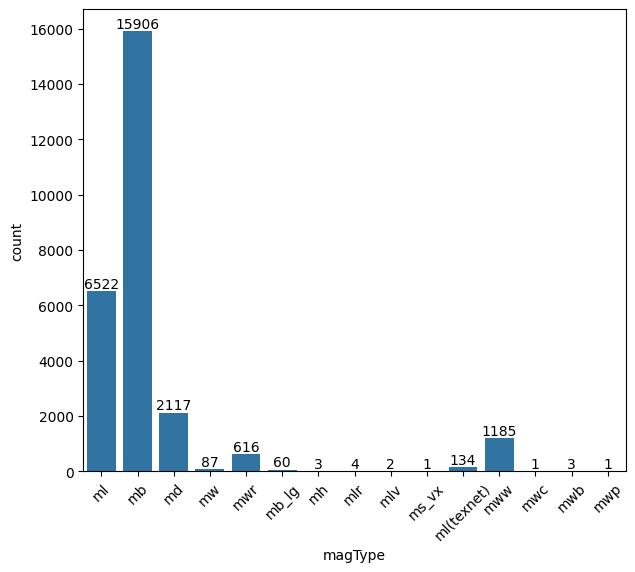

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='magType',data=data)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

[Text(0, 0, '26566'), Text(0, 0, '76')]

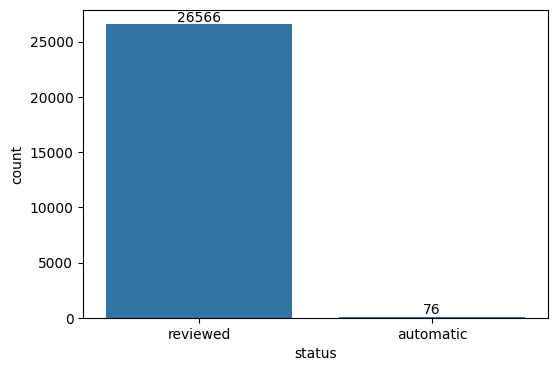

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='status',data=data)
ax.bar_label(ax.containers[0])


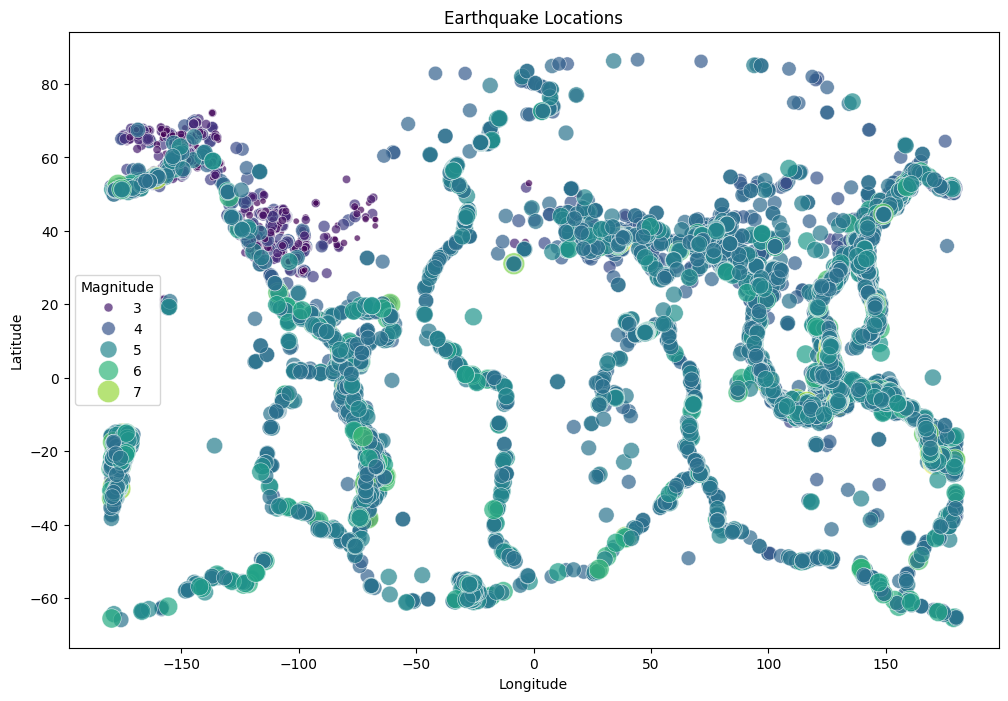

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag',sizes=(20, 300),
 data=data, palette='viridis', alpha=0.7)
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

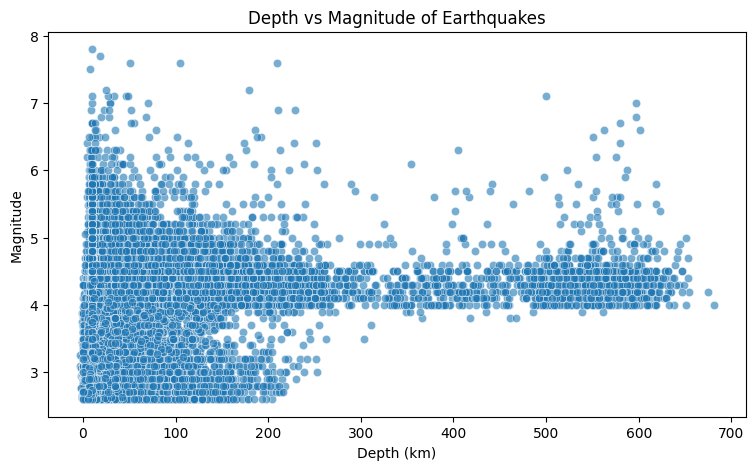

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot( x=data["depth"], y=data["mag"], alpha=0.6)
plt.title('Depth vs Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
data['time'] = pd.to_datetime(data['time'], yearfirst=True)
data['month'] = data['time'].dt.month_name()
data['year'] = data['time'].dt.year
data['day'] = data['time'].dt.day
data['date'] = data['time'].dt.date

In [ ]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
month                 0
year                  0
day                   0
date                  0
dtype: int64

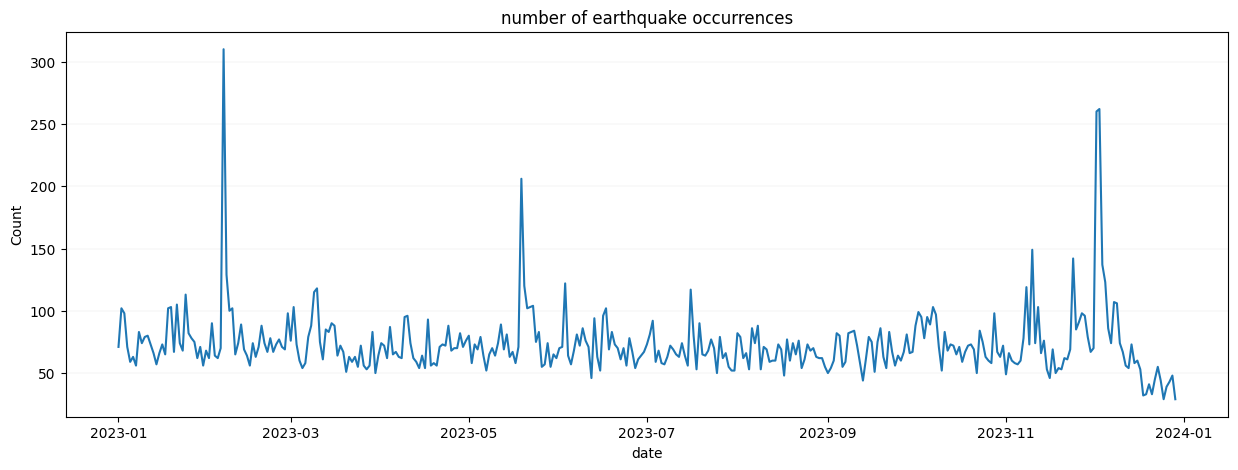

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data.groupby('date')['day'].count().reset_index(name='Count'), x='date', y='Count')
plt.grid(axis='y',linewidth=0.1)
plt.title('number of earthquake occurrences')
plt.show()

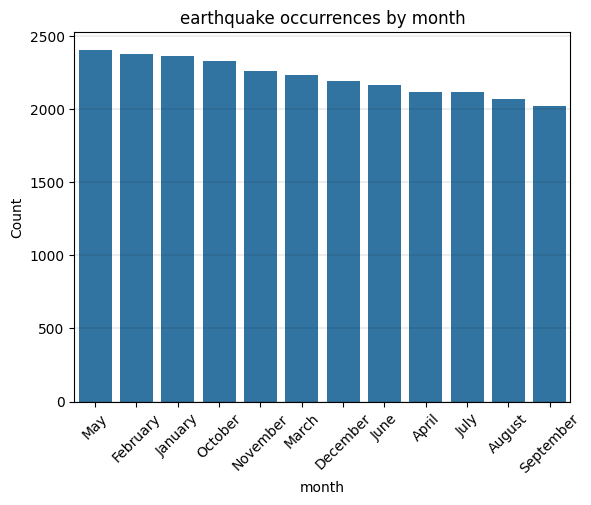

In [ ]:
sns.barplot(data.groupby(['month'])['day'].count().sort_values(ascending=False).sort_values(ascending=False).reset_index(name='Count'), x='month', y='Count')
plt.xticks(rotation=45)
plt.title('earthquake occurrences by month')
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.1)
plt.show()

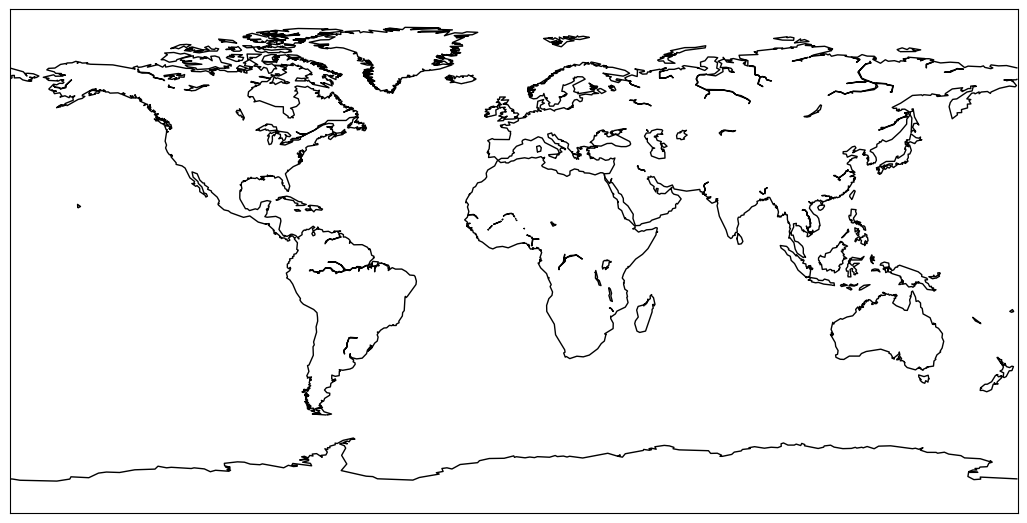

In [ ]:
plt.rcParams["figure.figsize"]=13,13
m=Basemap()
m.drawcoastlines()

plt.show();

In [ ]:
lats = data['latitude'].values
lons = data['longitude'].values
magnitudes = data['mag'].values

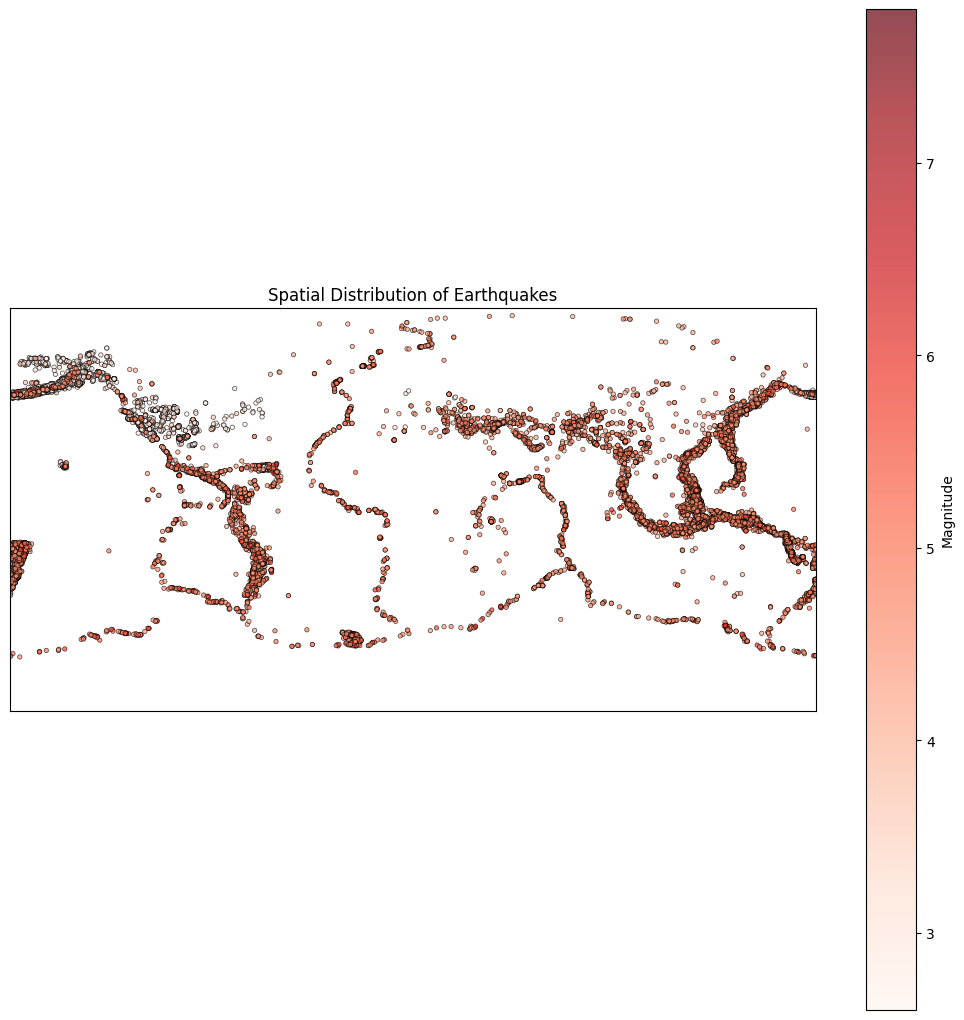

In [ ]:
# Scatter plot earthquake locations on the map
x, y = m(lons, lats)
m.scatter(x, y, c=magnitudes, s=10, cmap='Reds', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.colorbar(label='Magnitude')
plt.title('Spatial Distribution of Earthquakes')
plt.show()

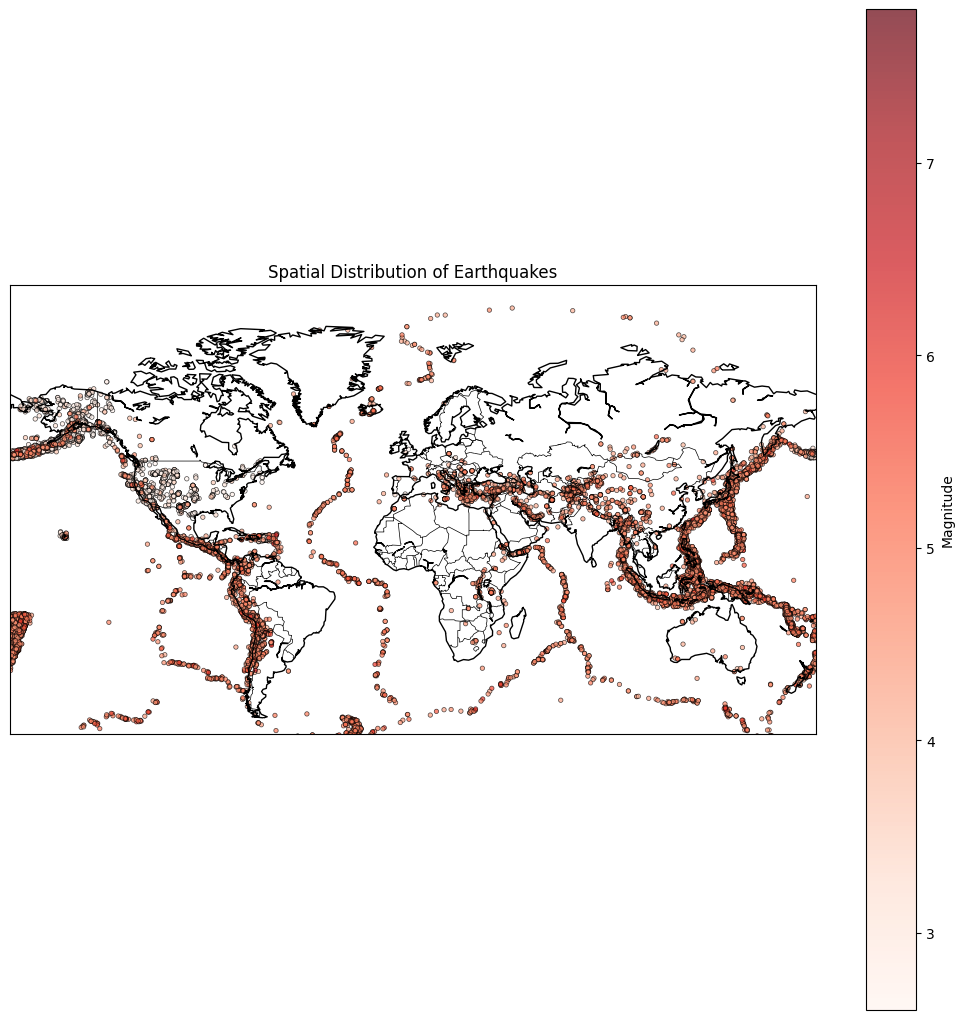

In [ ]:
plt.rcParams["figure.figsize"] = 13, 13
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
# Scatter plot earthquake locations on the map
x, y = m(lons, lats)
m.scatter(x, y, c=magnitudes, s=10, cmap='Reds', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.colorbar(label='Magnitude')
plt.title('Spatial Distribution of Earthquakes')
plt.show()

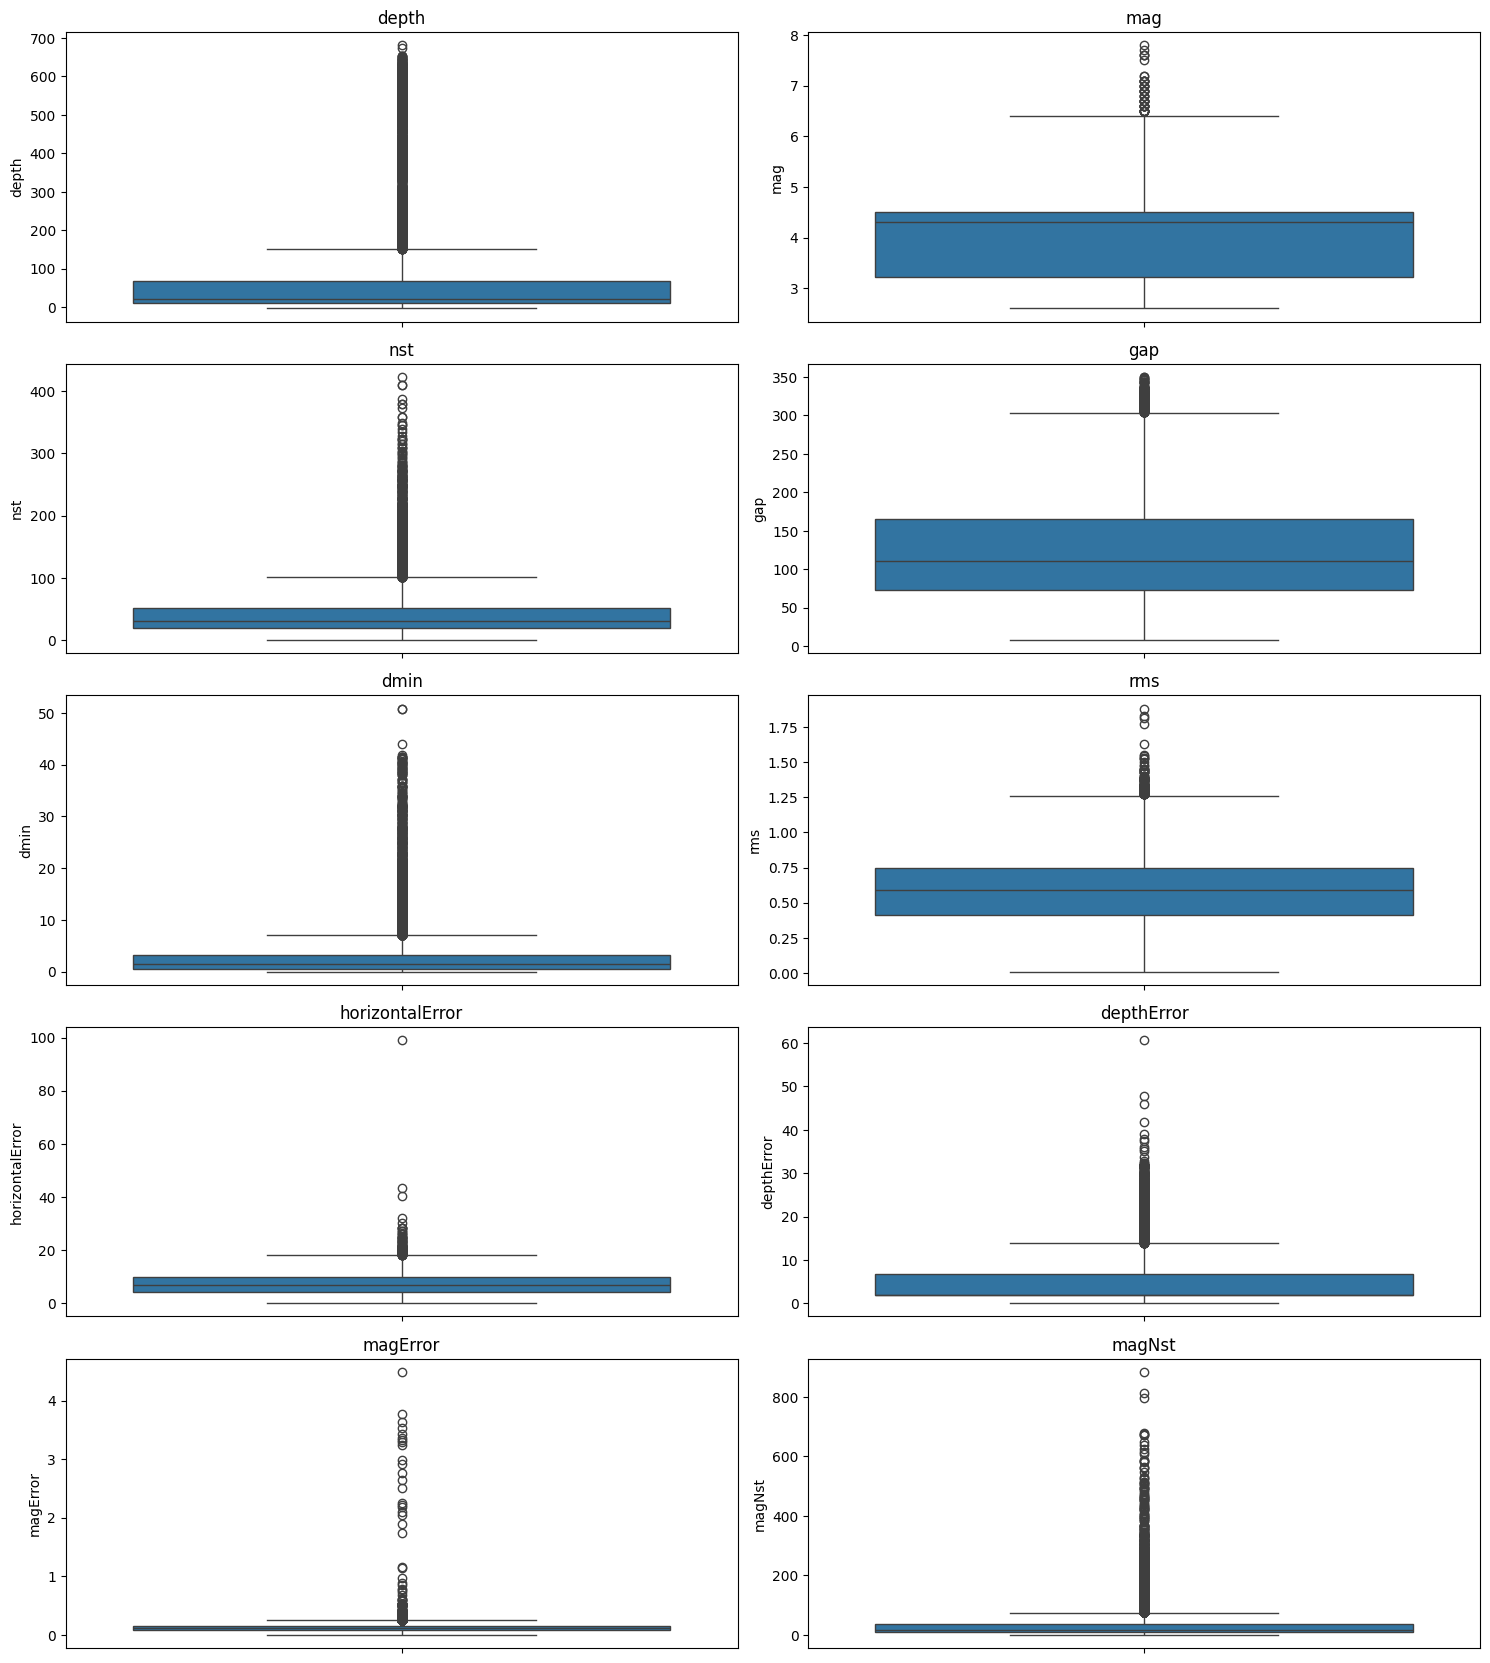

In [ ]:
def plot_all_boxplots(data):

    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_cols = num_cols.drop(['latitude', 'longitude'])


    # Setting the size of the overall plot
    plt.figure(figsize=(15, 20))

    # Creating a boxplot for each numerical column
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) // 2 + 1, 2, i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

#Calling the function to plot boxplots
plot_all_boxplots(data)

In [ ]:
cols=data.select_dtypes(include=[np.number]).columns

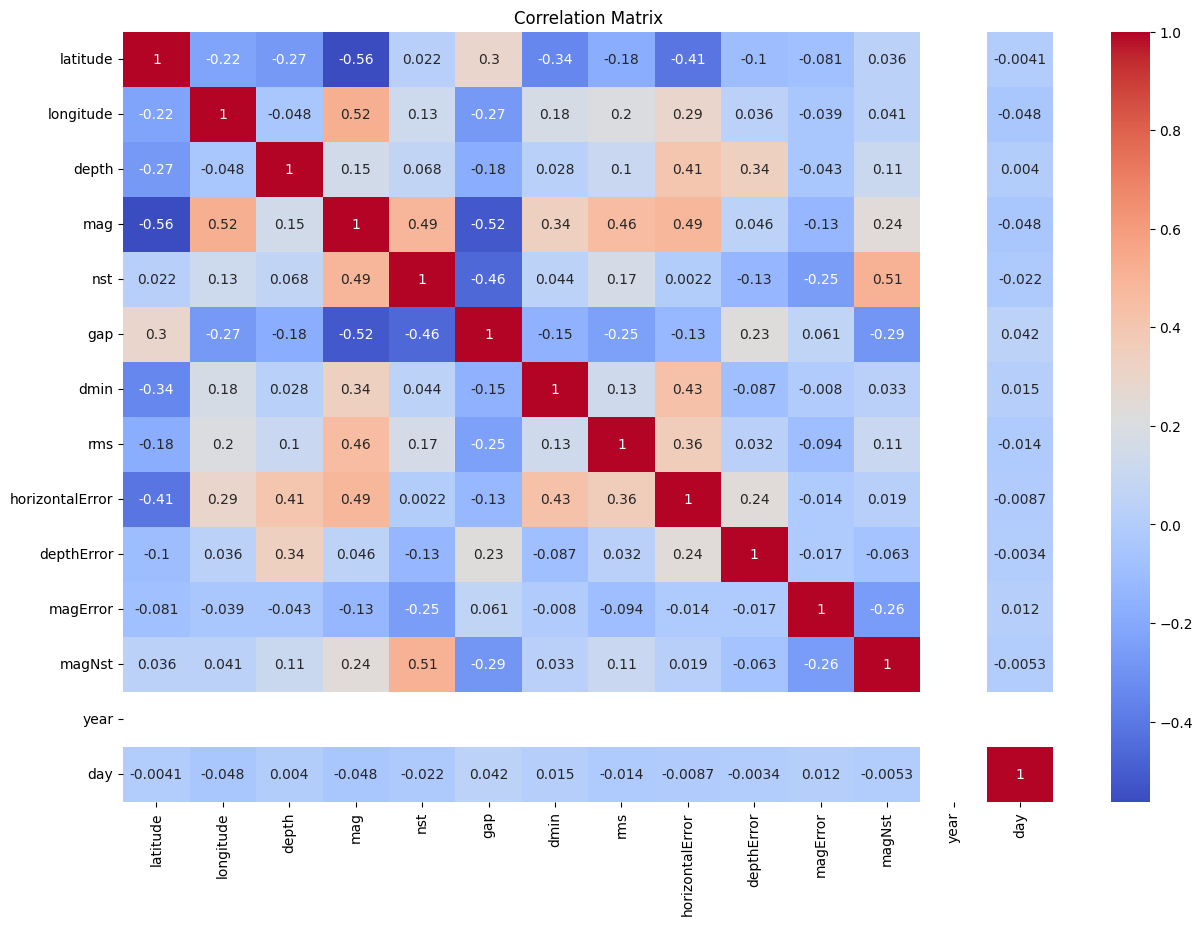

In [ ]:
# Correlation Analysis
plt.figure(figsize=(15,10))
corr = data[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Removing seismic activities other than earthquake**

In [ ]:
data['type'].unique()

array(['earthquake', 'mining explosion', 'quarry blast', 'ice quake',
       'explosion', 'Landslide', 'volcanic eruption', 'landslide'],
      dtype=object)

In [ ]:
#Removing seismic activities other than earthquake

data = data[data['type'] == 'earthquake']

# **Handling Outliers**

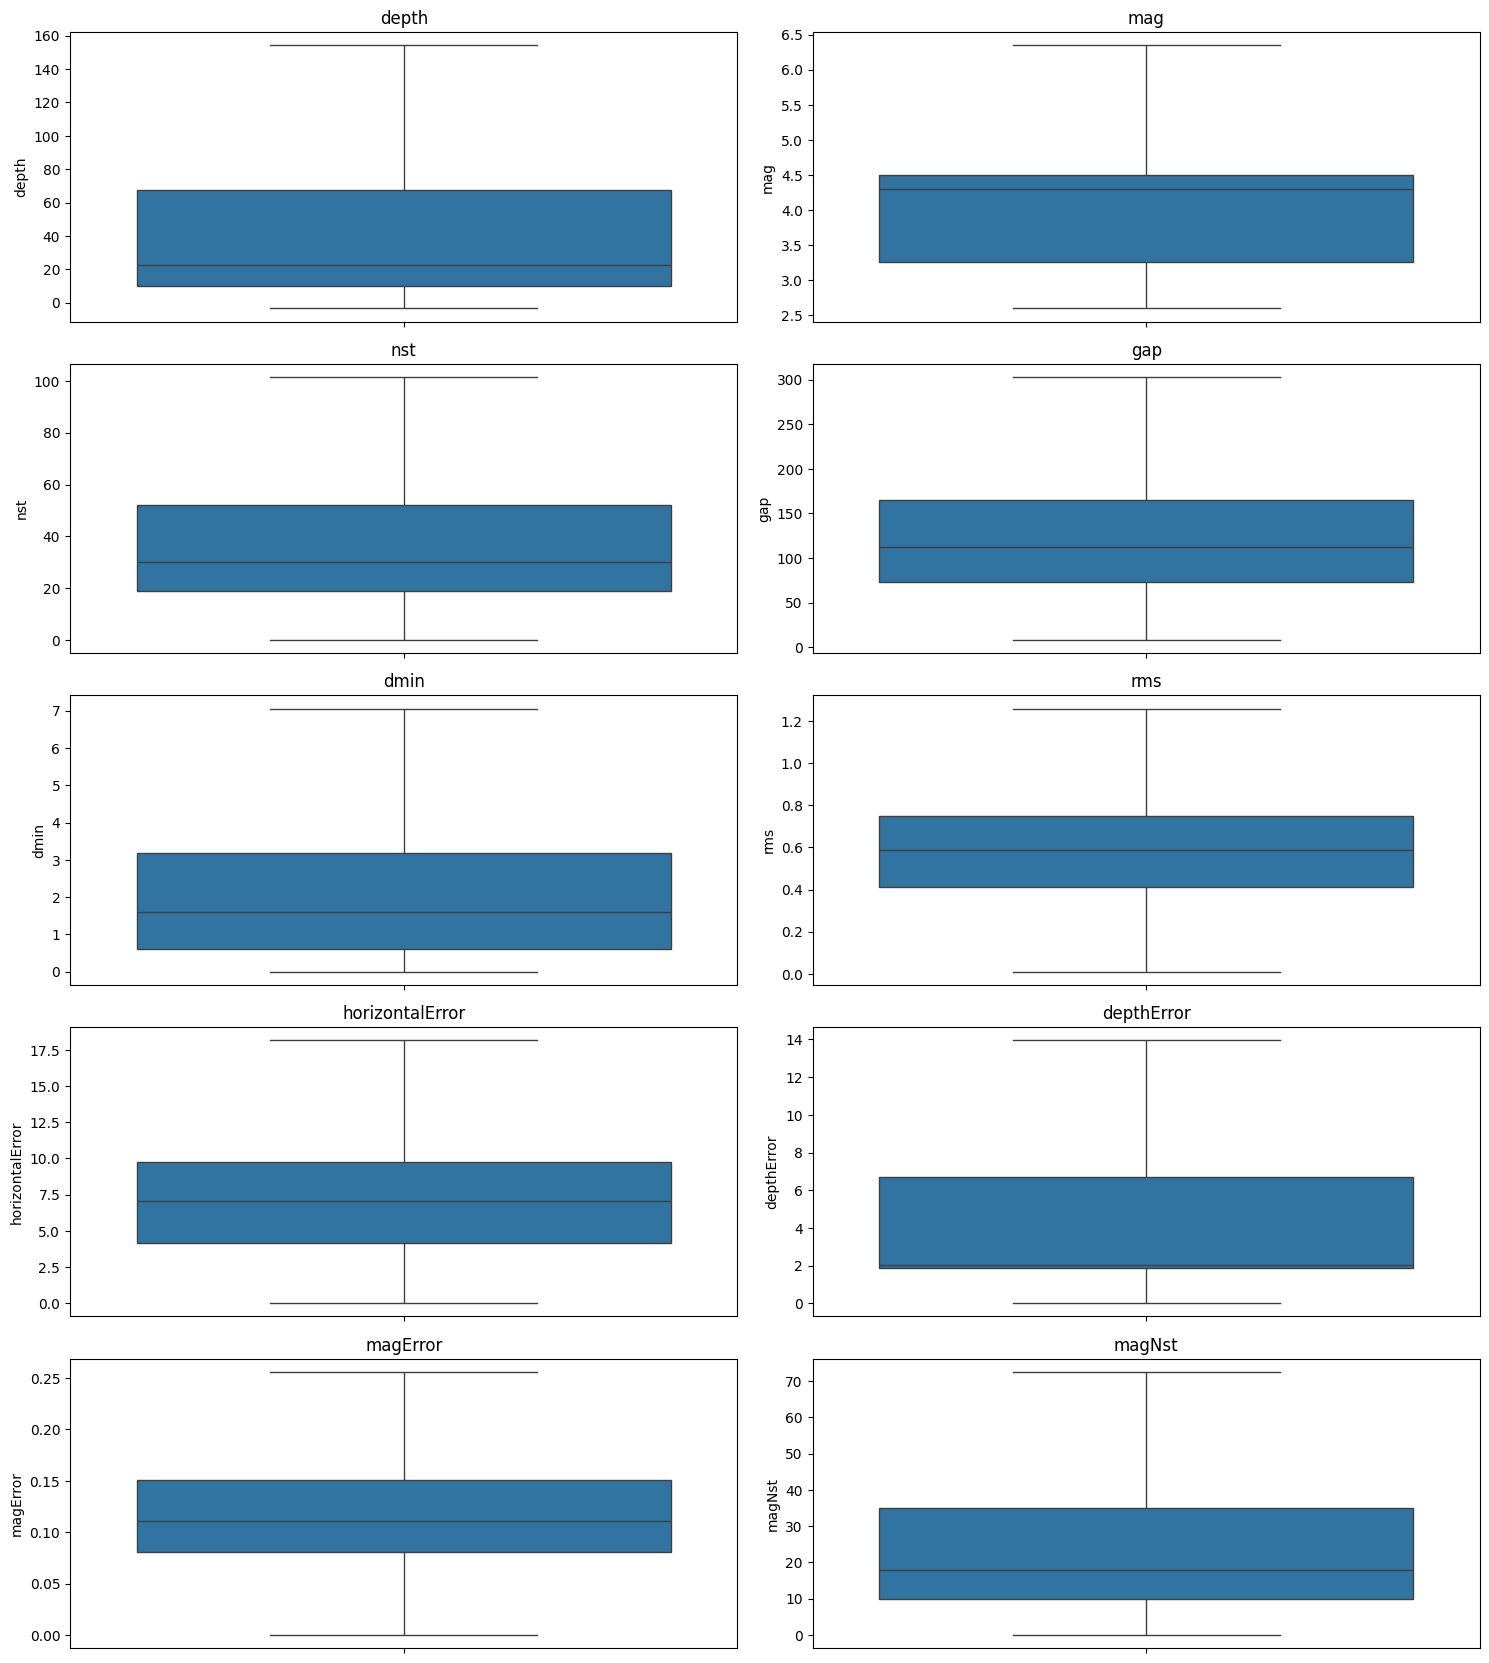

In [ ]:
def handle_outliers(data):

    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data

# Handle outliers in the dataset
data_cleaned = handle_outliers(data)

# Plot boxplots again to check if outliers are handled
plot_all_boxplots(data_cleaned)

# **Handling duplicate rows**

In [ ]:
data.duplicated().sum()

1957

In [ ]:
duplicates = data[data.duplicated()]

print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 1957


In [ ]:
# Remove duplicate rows

data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

# **Handling Missing Values**

In [ ]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1381
gap                1382
dmin               1831
rms                   0
net                   0
id                    0
updated               0
place              1455
type                  0
horizontalError    1514
depthError            0
magError           1613
magNst             1519
status                0
locationSource        0
magSource             0
month                 0
year                  0
day                   0
date                  0
dtype: int64

In [ ]:
# fill the null value
data['nst'].fillna(data['nst'].median(), inplace=True)

data['gap'].fillna(data['gap'].median(), inplace=True)

data['dmin'].fillna(data['dmin'].median(), inplace=True)

data['horizontalError'].fillna(data['horizontalError'].median(), inplace=True)

data['magError'].fillna(data['magError'].median(), inplace=True)

data['magNst'].fillna(data['magNst'].median(), inplace=True)

In [ ]:
# For 'place' column, fill missing values with 'Unknown'

data['place'].fillna('Unknown', inplace=True)

In [ ]:
data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
month              0
year               0
day                0
date               0
dtype: int64

# **Encoding**

In [ ]:


# Assuming 'data' is your DataFrame
categorical_columns = ['magType','type', 'status', 'locationSource', 'magSource']

# Create the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [ ]:
data.head(15)

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,id,updated,place,horizontalError,depthError,magError,magNst,month,year,day,date,magType_mb,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_ml(texnet),magType_mlr,magType_mlv,magType_mw,magType_mwb,magType_mwc,magType_mwp,magType_mwr,magType_mww,type_earthquake,status_automatic,status_reviewed,locationSource_ak,locationSource_av,locationSource_ci,locationSource_hv,locationSource_nc,locationSource_nm,locationSource_nn,locationSource_ok,locationSource_pr,locationSource_se,locationSource_tx,locationSource_us,locationSource_uu,locationSource_uw,magSource_ak,magSource_av,magSource_ci,magSource_guc,magSource_hv,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg
0,2023-01-01 00:49:25.294000+00:00,52.099900,178.521800,82.770000,3.10,14.0,139.0,0.87000,0.18,us,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,13.957625,0.097,14.0,January,2023.0,1.0,2023-01-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2023-01-01 01:41:43.755000+00:00,7.139700,126.738000,79.194000,4.50,32.0,104.0,1.15200,0.47,us,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445000,0.083,43.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2023-01-01 03:29:31.070000+00:00,19.163100,-66.525100,24.000000,3.93,23.0,246.0,0.84790,0.22,pr,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,13.957625,0.090,16.0,January,2023.0,1.0,2023-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01 04:09:32.814000+00:00,-4.780300,102.767500,63.787000,4.30,17.0,187.0,0.45700,0.51,us,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579000,0.238,5.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2023-01-01 04:29:13.793000+00:00,53.396500,-166.941700,10.000000,3.00,19.0,190.0,0.40000,0.31,us,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999000,0.085,18.0,January,2023.0,1.0,2023-01-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2023-01-01 04:50:17.639000+00:00,19.281100,-155.428200,37.751000,2.80,19.0,127.0,0.06600,0.18,us,us7000j1c7,2023-03-11T22:51:29.040Z,"10 km NNE of P?hala, Hawaii",2.77,5.266000,0.060,36.0,January,2023.0,1.0,2023-01-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,2023-01-01 04:54:53.914000+00:00,-19.041900,-177.542300,154.233125,4.10,15.0,87.0,3.05100,0.15,us,us7000j3xu,2023-03-11T22:51:45.040Z,Fiji region,12.85,13.028000,0.213,6.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2023-01-01 05:02:46.402000+00:00,-15.321900,-174.875600,154.233125,4.10,40.0,81.0,3.41300,0.32,us,us7000j3xn,2023-03-11T22:51:45.040Z,Tonga,9.84,6.047000,0.095,34.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
data.isna().sum()

time              1649
latitude          1649
longitude         1649
depth             1649
mag               1649
                  ... 
magSource_tx      1649
magSource_us      1649
magSource_uu      1649
magSource_uw      1649
magSource_zamg    1649
Length: 70, dtype: int64

In [ ]:
data[data['time'].isna()]

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,id,updated,place,horizontalError,depthError,magError,magNst,month,year,day,date,magType_mb,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_ml(texnet),magType_mlr,magType_mlv,magType_mw,magType_mwb,magType_mwc,magType_mwp,magType_mwr,magType_mww,type_earthquake,status_automatic,status_reviewed,locationSource_ak,locationSource_av,locationSource_ci,locationSource_hv,locationSource_nc,locationSource_nm,locationSource_nn,locationSource_ok,locationSource_pr,locationSource_se,locationSource_tx,locationSource_us,locationSource_uu,locationSource_uw,magSource_ak,magSource_av,magSource_ci,magSource_guc,magSource_hv,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg
115,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
245,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
246,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
324,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
335,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24453,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24458,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24460,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data.shape

(26120, 70)

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(22822, 70)

In [ ]:
data.isna().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
                 ..
magSource_tx      0
magSource_us      0
magSource_uu      0
magSource_uw      0
magSource_zamg    0
Length: 70, dtype: int64

In [ ]:
data.head()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,id,updated,place,horizontalError,depthError,magError,magNst,month,year,day,date,magType_mb,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_ml(texnet),magType_mlr,magType_mlv,magType_mw,magType_mwb,magType_mwc,magType_mwp,magType_mwr,magType_mww,type_earthquake,status_automatic,status_reviewed,locationSource_ak,locationSource_av,locationSource_ci,locationSource_hv,locationSource_nc,locationSource_nm,locationSource_nn,locationSource_ok,locationSource_pr,locationSource_se,locationSource_tx,locationSource_us,locationSource_uu,locationSource_uw,magSource_ak,magSource_av,magSource_ci,magSource_guc,magSource_hv,magSource_nc,magSource_nm,magSource_nn,magSource_ok,magSource_pgc,magSource_pr,magSource_se,magSource_slm,magSource_tx,magSource_us,magSource_uu,magSource_uw,magSource_zamg
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.8700,0.18,us,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",8.46,13.957625,0.097,14.0,January,2023.0,1.0,2023-01-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,1.1520,0.47,us,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",5.51,7.445000,0.083,43.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.8479,0.22,pr,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,0.91,13.957625,0.090,16.0,January,2023.0,1.0,2023-01-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.4570,0.51,us,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579000,0.238,5.0,January,2023.0,1.0,2023-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.4000,0.31,us,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",1.41,1.999000,0.085,18.0,January,2023.0,1.0,2023-01-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Scaling**

Since we only require latitude,longitude & depth'horizontalError', 'depthError', 'magError' columns for magnitude prediction, other columns aren't taken into consideration.


In [ ]:
#  import standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import time

# **Feature Selection**

In [ ]:
features = data[['latitude', 'longitude', 'depth', 'horizontalError', 'depthError', 'magError']]
target = data['mag']

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)